### Importing Necessary packages 

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
!pip install plotly
!pip install cufflinks 
!pip install textblob

In [49]:
import plotly as py 
import cufflinks as cf 

In [50]:
from plotly.offline import iplot

In [51]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Importing Data

In [52]:
df = pd.read_csv("Jachai.csv", index_col = 0)
df.head()

,Title,Claim,Content,Image,Url,Category,Published Date,Modified Date
ID,,,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,https://assets.jachai.org/uploads/2021/08/shei...,https://www.jachai.org/fact-checks/post-3663,fake-news,2021-08-30,2021-09-01
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,https://assets.jachai.org/uploads/2021/08/hype...,https://www.jachai.org/fact-checks/post-3591,fake-news,2021-08-28,2021-08-28
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,https://assets.jachai.org/uploads/2021/08/saki...,https://www.jachai.org/fact-checks/post-3541,fake-news,2021-08-25,2021-08-26
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",https://assets.jachai.org/uploads/2021/08/imag...,https://www.jachai.org/fact-checks/post-3487,fauxtography,2021-08-25,2021-09-02
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,https://assets.jachai.org/uploads/2021/08/imag...,https://www.jachai.org/fact-checks/post-3454,fake-news,2021-08-21,2021-08-21


In [53]:
df.drop(labels=['Image','Url'], axis=1, inplace = True)

In [54]:
df.head()

,Title,Claim,Content,Category,Published Date,Modified Date
ID,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,fake-news,2021-08-25,2021-08-26
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",fauxtography,2021-08-25,2021-09-02
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,fake-news,2021-08-21,2021-08-21


In [55]:
df.isnull().sum()

Title             0
Claim             3
Content           0
Category          0
Published Date    0
Modified Date     0
dtype: int64

In [56]:
df.dropna(subset=['Claim'], inplace=True)

In [57]:
df.isnull().sum()

Title             0
Claim             0
Content           0
Category          0
Published Date    0
Modified Date     0
dtype: int64

In [58]:
' '.join(df['Title'].tolist())

'শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্রী নির্বাচিত? শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম? বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব? সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণীর লাশ উদ্ধার? ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়ানো রোনালদো? কাবুল দখলের পর তালেবানদের উল্লাস নাচ? ড. জাহাঙ্গীর কবিরের প্রদত্ত ‘ভ্যাকসিন সংক্রান্ত’ এই তথ্যগুলো কতটুকু সঠিক? ইসলামিক পদ্ধতিতে জবাইতে পশু ব্যথা অনুভব করে না — এই ভাইরাল পোস্টের সত্যতা কতটুকু? ব্রাজিলে আযান দেওয়া নিষিদ্ধ ও আর্জেন্টিনায় ‘আল্লাহু আকবার’ বললে গ্রেফতার? সময় টিভিতে উল্লেখিত এসব কি ইজরাইলি কোম্পানি? ভিডিওটি কি আইনমন্ত্রী আনিসুল হকের মায়ের জানাজার? ইথানলের ভাপ নিয়ে করোনাভাইরাসের চিকিৎসা করা যায়? করোনাভাইরাস সম্পর্কিত এই ‘বিশেষ হেলথ বুলেটিন’-এর তথ্য কতটা সঠিক? ভেঙ্গে পড়েছে আকাশবীণার দরজা? আইআরআই জরিপে ২০১৮ সালে কি শেখ হাসিনার জনপ্রিয়তা উল্লেখযোগ্য হারে ‘বৃদ্ধি’ পেয়েছে? ছবিটি কি জিগাতলায় ছাত্রছাত্রীদের উপর সংঘটিত সন্ত্রাসী হামলার? বাংলাদেশ কি ভারতের চতুর্থ সর্ববৃহৎ রেমিটেন্সের উৎস? ফেসবুক বন্ধ করে দেওয়ার সিদ্ধ

In [59]:
' '.join(df['Claim'].tolist())

'"দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শেখ হাসিনাকে বিশ্বের সবচেয়ে নিকৃষ্ট শাসক হিসেবে নির্বাচিত করা হয়েছে।" চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন বছর বয়সী শিশুর গায়ে ‘পশুর’ লোম উঠছে "বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদেশের ক্রিকেট টিমের সাকিব আল হাসান" "পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণীর লাশ উদ্ধার" ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস ফুটবল ক্লাব’ থেকে অব্যাহতি নিয়ে ‘পারি সাঁ-জেরমাঁ ফুটবল ক্লাব’ (পিএসজি)-তে যোগদান করছেন। ভিডিওতে আফগানিস্তানের কাবুল দখলের পর তালেবানদের গানের তালে তালে নাচতে দেখা যাচ্ছে। টিকার মাধ্যমে শরীরে যে \'কৃত্রিম\' এন্টিবডি তৈরি হয় সেটি \'প্রাকৃতিক\' এন্টিবডির জন্য ক্ষতিকর। কোভিড-১৯ টিকা অকার্যকর ও ক্ষতিকর হওয়ায় এই রোগ থেকে সুরক্ষা পেতে শরীরের রোগ প্রতিরোধ ক্ষমতা বৃদ্ধি করতে হবে। \'ইসলামিক পদ্ধতিতে পশু জবাই’ এর উপর জার্মানিতে একটি গবেষণা করা হয় যাতে দেখা যায় এই পদ্ধতিতে জবাইয়ের পর পশু ব্যথা অনুভব করে না। "ব্রাজিলে মুসলমানদের আযান দেওয়া নিষিদ্ধ ও আর্জেন্টিনায় ‘আল্লাহু আকবার’ বললে গ্রেফতার করা হয়।" "বাংলাদেশে বহুল 

In [60]:
' '.join(df['Content'].tolist())

'এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের নাম দিয়ে প্রধানমন্ত্রী শেখ হাসিনা সম্পর্কে ভাইরাল বানোয়াট সংবাদগুলোকে কটাক্ষ করা হয়েছে। দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আসছে বিভিন্ন নিউজপোর্টাল। সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং সাকিব তার ক্রিকেট ক্যারিয়ার কবে শেষ করছেন সেটি নিয়ে আলোচনা করেছেন। ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদেশের নয়। ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খবর সুনিশ্চিত না এবং কোনো ক্লাবের সাথে তার যোগদানের আলোচনা চলছে এমন কোনো সংবাদ নির্ভরযোগ্য কোনো মাধ্যমে পাওয়া যায়নি। ভিডিওটি পাকিস্তানের একটি বিয়ে অনুষ্ঠানের। আলোচিত ভিডিওতে ভ্যাকসিন ও শরীরের রোগ প্রতিরোধ ক্ষমতার কার্যনীতির ব্যাপারে মৌলিক পর্যায় তার অজ্ঞতাই প্রমাণিত হয়েছে এবং তার অধিকাংশ বক্তব্য আধুনিক চিকিৎসা বিজ্ঞানের সাথে সাংঘর্ষিক। গবেষণাটি মূলত ইহুদী ধর্মালম্বিদের ‘কোশার’ পদ্ধতির উপর ছিলো। সরাসরি ধর্মীয় পদ্ধতি পশু জবাই করা হলে, সেটি ভেড়া ও বাছুরের ক্ষেত্রে ব্যথাহীন। এই দাবীকে সমর্থন করে এমন কোনো তথ্য বা আইন কিংবা সংবাদ ফেসবুকের কিছু পোস্ট ছাড়া আর কোথাও খুঁজে পাওয়া য

In [61]:
contractions = {
    '0':'০',
    '1':'১',
    '2':'২',
    '3':'৩',
    '4':'৪',
    '5':'৫',
    '6':'৬',
    '7':'৭',
    '8':'৮',
    '9':'৯',
    '\n':'',
    '\xa0':''
}

In [62]:
#removing the '\' signs and converting the numbers into bengali
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
#             print(value)
            x = x.replace(key, value)
        return x
    else:
        return x

In [63]:
# cont_to_exp('ঘাঁটি \'ট্রেজার হান্টার\' ')

In [64]:
%%time
df['Claim'] = df['Claim'].apply(lambda x : cont_to_exp(x))

CPU times: user 3.08 ms, sys: 489 µs, total: 3.57 ms
Wall time: 2.95 ms


In [65]:
%%time
df['Content'] = df['Content'].apply(lambda x : cont_to_exp(x))

CPU times: user 0 ns, sys: 3.2 ms, total: 3.2 ms
Wall time: 2.65 ms


In [66]:
df.head()

,Title,Claim,Content,Category,Published Date,Modified Date
ID,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,fake-news,2021-08-25,2021-08-26
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",fauxtography,2021-08-25,2021-09-02
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,fake-news,2021-08-21,2021-08-21


In [67]:
all_claims = ' '.join(df['Claim'].tolist())[0:50000]
print(all_claims)

"দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শেখ হাসিনাকে বিশ্বের সবচেয়ে নিকৃষ্ট শাসক হিসেবে নির্বাচিত করা হয়েছে।" চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন বছর বয়সী শিশুর গায়ে ‘পশুর’ লোম উঠছে "বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদেশের ক্রিকেট টিমের সাকিব আল হাসান" "পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণীর লাশ উদ্ধার" ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস ফুটবল ক্লাব’ থেকে অব্যাহতি নিয়ে ‘পারি সাঁ-জেরমাঁ ফুটবল ক্লাব’ (পিএসজি)-তে যোগদান করছেন। ভিডিওতে আফগানিস্তানের কাবুল দখলের পর তালেবানদের গানের তালে তালে নাচতে দেখা যাচ্ছে। টিকার মাধ্যমে শরীরে যে 'কৃত্রিম' এন্টিবডি তৈরি হয় সেটি 'প্রাকৃতিক' এন্টিবডির জন্য ক্ষতিকর। কোভিড-১৯ টিকা অকার্যকর ও ক্ষতিকর হওয়ায় এই রোগ থেকে সুরক্ষা পেতে শরীরের রোগ প্রতিরোধ ক্ষমতা বৃদ্ধি করতে হবে। 'ইসলামিক পদ্ধতিতে পশু জবাই’ এর উপর জার্মানিতে একটি গবেষণা করা হয় যাতে দেখা যায় এই পদ্ধতিতে জবাইয়ের পর পশু ব্যথা অনুভব করে না। "ব্রাজিলে মুসলমানদের আযান দেওয়া নিষিদ্ধ ও আর্জেন্টিনায় ‘আল্লাহু আকবার’ বললে গ্রেফতার করা হয়।" "বাংলাদেশে বহুল ব্যবহৃ

In [68]:
all_contents = ' '.join(df['Content'].tolist())[0:50000] 
print(all_contents)

এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের নাম দিয়ে প্রধানমন্ত্রী শেখ হাসিনা সম্পর্কে ভাইরাল বানোয়াট সংবাদগুলোকে কটাক্ষ করা হয়েছে। দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আসছে বিভিন্ন নিউজপোর্টাল। সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং সাকিব তার ক্রিকেট ক্যারিয়ার কবে শেষ করছেন সেটি নিয়ে আলোচনা করেছেন। ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদেশের নয়। ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খবর সুনিশ্চিত না এবং কোনো ক্লাবের সাথে তার যোগদানের আলোচনা চলছে এমন কোনো সংবাদ নির্ভরযোগ্য কোনো মাধ্যমে পাওয়া যায়নি। ভিডিওটি পাকিস্তানের একটি বিয়ে অনুষ্ঠানের। আলোচিত ভিডিওতে ভ্যাকসিন ও শরীরের রোগ প্রতিরোধ ক্ষমতার কার্যনীতির ব্যাপারে মৌলিক পর্যায় তার অজ্ঞতাই প্রমাণিত হয়েছে এবং তার অধিকাংশ বক্তব্য আধুনিক চিকিৎসা বিজ্ঞানের সাথে সাংঘর্ষিক। গবেষণাটি মূলত ইহুদী ধর্মালম্বিদের ‘কোশার’ পদ্ধতির উপর ছিলো। সরাসরি ধর্মীয় পদ্ধতি পশু জবাই করা হলে, সেটি ভেড়া ও বাছুরের ক্ষেত্রে ব্যথাহীন। এই দাবীকে সমর্থন করে এমন কোনো তথ্য বা আইন কিংবা সংবাদ ফেসবুকের কিছু পোস্ট ছাড়া আর কোথাও খুঁজে পাওয়া যা

## Feature Engineering

In [69]:
from textblob import TextBlob

In [70]:
df.head()

,Title,Claim,Content,Category,Published Date,Modified Date
ID,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,fake-news,2021-08-25,2021-08-26
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",fauxtography,2021-08-25,2021-09-02
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,fake-news,2021-08-21,2021-08-21


In [71]:
df['title_polarity'] = df['Title'].apply(lambda x : TextBlob(x).sentiment.polarity) #checking if there is any plarity in the title text

In [72]:
df.head()

,Title,Claim,Content,Category,Published Date,Modified Date,title_polarity
ID,,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01,0.0
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28,0.0
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,fake-news,2021-08-25,2021-08-26,0.0
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",fauxtography,2021-08-25,2021-09-02,0.0
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,fake-news,2021-08-21,2021-08-21,0.0


In [73]:
df['title_polarity'].sum()

0.0

In [74]:
df['claim_polarity'] = df['Claim'].apply(lambda x : TextBlob(x).sentiment.polarity) #checking if there is any plarity in the text

In [75]:
df['claim_polarity'].sum()

0.0

In [76]:
df['content_polarity'] = df['Content'].apply(lambda x : TextBlob(x).sentiment.polarity) #checking if there is any plarity in the text

In [77]:
df['content_polarity'].sum()

0.0

In [78]:
df['title_len'] = df['Title'].apply(lambda x : len(x))  #length of the title

In [79]:
df['claim_len'] = df['Claim'].apply(lambda x : len(x))    #length of the claims

In [80]:
df['content_len'] = df['Content'].apply(lambda x : len(x))    #length of the claims

In [81]:
df['title_word_count'] = df['Title'].apply(lambda x : len(x.split()))

In [82]:
df['claim_word_count'] = df['Claim'].apply(lambda x : len(x.split()))

In [83]:
df['content_word_count'] = df['Content'].apply(lambda x : len(x.split()))

In [84]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [85]:
# def get_avg_word_len2(x):
#     def count_chars(a):
#         char_count = len(a)
#         return char_count
    
#     def count_words(b):
#         word_count = b.str.split()
#         return word_count
# #     print(count_chars(x))
# #     print(count_words(x))
#     return (count_chars(x)/count_words(x))
    

In [86]:
df['title_avg_word_len'] = df['Title'].apply(lambda x : get_avg_word_len(x))

In [87]:
# df['text_avg_word_len'] = df['title_bn'].apply(lambda x : get_avg_word_len2(x))

In [88]:
# df.drop(labels=['content_word_count','claim_word_count','title_avg_word_len','title_word_count'], axis=1, inplace = True)

In [89]:
df.head()

,Title,Claim,Content,Category,Published Date,Modified Date,title_polarity,claim_polarity,content_polarity,title_len,claim_len,content_len,title_word_count,claim_word_count,content_word_count,title_avg_word_len
ID,,,,,,,,,,,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01,0.0,0.0,0.0,59,114,137,7,14,19,7.571429
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28,0.0,0.0,0.0,40,82,70,7,13,11,4.857143
3,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,"""বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...",সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...,fake-news,2021-08-25,2021-08-26,0.0,0.0,0.0,44,80,112,7,12,18,5.428571
4,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,"""পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...","ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...",fauxtography,2021-08-25,2021-09-02,0.0,0.0,0.0,66,60,53,11,10,7,5.090909
5,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...,ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...,fake-news,2021-08-21,2021-08-21,0.0,0.0,0.0,57,135,160,7,17,24,7.285714


## Distribution and Sentiment Polarity

In [90]:
# df['title_polarity'].iplot(kind='scatter',xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution'

In [91]:
df['title_polarity'].iplot(kind='scatter', xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution')

In [92]:
df['claim_polarity'].iplot(kind='scatter', xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution')

In [93]:
df['content_polarity'].iplot(kind='scatter', xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution')

In [94]:
df.columns

Index(['Title', 'Claim', 'Content', 'Category', 'Published Date',
       'Modified Date', 'title_polarity', 'claim_polarity', 'content_polarity',
       'title_len', 'claim_len', 'content_len', 'title_word_count',
       'claim_word_count', 'content_word_count', 'title_avg_word_len'],
      dtype='object')

In [95]:
df['Category'].iplot(kind='hist', xTitle='categories', yTitle = 'count', title = 'Label Distribution')

In [96]:
# df['type'].iplot(kind='hist', xTitle='train/test data', yTitle = 'count', title = 'Type Distribution')

## Distribution of the Title Text Legth and Word Length

In [97]:
df['title_len'].iplot(kind = 'hist',bins = 50,  xTitle = 'title length(chars)', yTitle = 'count', title = 'title length distribution')

In [98]:
df['claim_len'].iplot(kind = 'hist',bins = 100,  xTitle = 'text length(chars)', yTitle = 'count', title = 'text length distribution')

In [99]:
df['content_len'].iplot(kind = 'hist',bins = 100,  xTitle = 'text length(chars)', yTitle = 'count', title = 'text length distribution')

In [100]:
df['title_word_count'].iplot(kind = 'hist',  xTitle = 'title word length', yTitle = 'count', title = 'title word count distribution')

In [101]:
df['claim_word_count'].iplot(kind = 'hist',bins = 300,  xTitle = 'text word length', yTitle = 'count', title = 'text word count distribution')

In [102]:
df['content_word_count'].iplot(kind = 'hist',bins = 300,  xTitle = 'text word length', yTitle = 'count', title = 'text word count distribution')

In [103]:
df['title_avg_word_len'].iplot(kind = 'hist',bins = 200,  xTitle = 'title avg word length', yTitle = 'count', title = 'Title Average Word length distribution')

## Distribution of Unigram, Bigram and Trigram

### Unigram

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
x = ['আমরা আমাদের আমাদের যথাসাধ্য চেষ্টা করবো করবো করবো']
# x = this is a test example
# unigram = this, is , a , test, example 
# bigram = this is, a test, test example
# trigram = this is a , is a test, a test example

In [106]:
vec = CountVectorizer().fit(x)
bow = vec.transform(x)
bow

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [107]:
sum_words = bow.sum(axis = 0)
sum_words

matrix([[2, 1, 3, 1]])

In [108]:
vec.vocabulary_.items() #it shows the position of words in the sum_words list

dict_items([('আমর', 1), ('আম', 0), ('যথ', 3), ('করব', 2)])

In [109]:
word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
word_freq

[('আমর', 1), ('আম', 2), ('যথ', 1), ('করব', 3)]

In [110]:
words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
words_freq

[('করব', 3), ('আম', 2), ('আমর', 1), ('যথ', 1)]

In [111]:
def top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [112]:
top_n_words(x,4)

[('করব', 3), ('আম', 2), ('আমর', 1), ('যথ', 1)]

In [113]:
words_title = top_n_words(df['Title'], 20)
words_title

[('কর', 39),
 ('হয়', 17),
 ('এই', 11),
 ('ওয়', 11),
 ('ছব', 11),
 ('রত', 11),
 ('পর', 8),
 ('উল', 7),
 ('ইসল', 7),
 ('রক', 7),
 ('এর', 6),
 ('আক', 6),
 ('জন', 6),
 ('রস', 5),
 ('ধর', 5),
 ('ইন', 5),
 ('ইল', 4),
 ('ইর', 4),
 ('সম', 4),
 ('উপর', 4)]

In [114]:
words_claim = top_n_words(df['Claim'], 20)
words_claim

[('কর', 72),
 ('হয়', 28),
 ('জন', 17),
 ('রত', 17),
 ('মক', 12),
 ('ইন', 11),
 ('একট', 11),
 ('ওয়', 11),
 ('বল', 11),
 ('পর', 10),
 ('এই', 10),
 ('আক', 10),
 ('রস', 10),
 ('রক', 9),
 ('ছব', 8),
 ('রণ', 8),
 ('১০', 7),
 ('হত', 7),
 ('রধ', 7),
 ('নমন', 7)]

In [115]:
df1 = pd.DataFrame(words_title, columns = ['Unigram', 'Frequency'])
df2 = pd.DataFrame(words_claim, columns = ['Unigram', 'Frequency'])

In [116]:
df1

,Unigram,Frequency
0,কর,39
1,হয়,17
2,এই,11
3,ওয়,11
4,ছব,11
5,রত,11
6,পর,8
7,উল,7
8,ইসল,7
9,রক,7


In [117]:
df1 = df1.set_index('Unigram')
df1.iplot(kind='bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 Unigram Words in Titles' )

In [118]:
df2

,Unigram,Frequency
0,কর,72
1,হয়,28
2,জন,17
3,রত,17
4,মক,12
5,ইন,11
6,একট,11
7,ওয়,11
8,বল,11
9,পর,10


In [119]:
df2 = df2.set_index('Unigram')
df2.iplot(kind='bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 Unigram Words in Texts' )

### Bigram

In [120]:
def top_n_bigrams(x,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [121]:
top_n_bigrams(x,5)

[('করব করব', 2), ('আমর আম', 1), ('আম আম', 1), ('আম যথ', 1), ('যথ করব', 1)]

In [122]:
bigram_words_title = top_n_bigrams(df['Title'], 20)
bigram_words_title

[('কর হয়', 8),
 ('ছব এই', 4),
 ('রধ নমন', 3),
 ('সতর কত', 3),
 ('ছব রত', 3),
 ('কতট সঠ', 2),
 ('কর ইর', 2),
 ('রক কর', 2),
 ('রস জন', 2),
 ('আক রমণ', 2),
 ('ভয় বহ', 2),
 ('রত গর', 2),
 ('ইসল ধর', 2),
 ('ধর রবর', 2),
 ('রবর তক', 2),
 ('ওয় হয়', 2),
 ('এই ছব', 2),
 ('সবচ রধ', 1),
 ('শর হঠ', 1),
 ('হঠ কর', 1)]

In [123]:
bigram_words_claim = top_n_bigrams(df['Claim'], 20)
bigram_words_claim

[('কর হয়', 11),
 ('রধ নমন', 6),
 ('কর হচ', 4),
 ('ইন রন', 3),
 ('রন শন', 3),
 ('ষত কর', 3),
 ('গব ষণ', 3),
 ('ষণ কর', 3),
 ('এই ছব', 3),
 ('রক কর', 3),
 ('সতর কত', 3),
 ('আক রমণ', 3),
 ('বর তম', 2),
 ('এন বড', 2),
 ('জন ষত', 2),
 ('পদ ধত', 2),
 ('একট গব', 2),
 ('কর ইর', 2),
 ('বল হয়', 2),
 ('বল ইন', 2)]

In [124]:
bigram_words_content = top_n_bigrams(df['Content'], 20)
bigram_words_content

[('কর হয়', 14),
 ('রচ কর', 7),
 ('সত নয়', 7),
 ('পদ ধত', 6),
 ('রচ এই', 5),
 ('ওয় য়ন', 4),
 ('গব ষণ', 4),
 ('সম বন', 4),
 ('কর এই', 4),
 ('যবহ কর', 4),
 ('এই ছব', 4),
 ('কর রচ', 3),
 ('ভরয যম', 3),
 ('যম ওয়', 3),
 ('হয় এব', 3),
 ('সর সর', 3),
 ('কর হল', 3),
 ('কর এমন', 3),
 ('এমন তথ', 3),
 ('সঠ নয়', 3)]

In [130]:
df3 = pd.DataFrame(bigram_words_title, columns = ['Bigram', 'Frequency'])
df4 = pd.DataFrame(bigram_words_claim, columns = ['Bigram', 'Frequency'])

In [131]:
df3 = df3.set_index('Bigram')
df3.iplot(kind='bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 Bigram Words in Titles' )

In [132]:
df4 = df4.set_index('Bigram')
df4.iplot(kind='bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 Bigram Words in Texts' )

### Trigram

In [133]:
def top_n_trigrams(x,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [134]:
top_n_trigrams(x,5)

[('আমর আম আম', 1),
 ('আম আম যথ', 1),
 ('আম যথ করব', 1),
 ('যথ করব করব', 1),
 ('করব করব করব', 1)]

In [135]:
trigram_words_title = top_n_trigrams(df['Title'], 20)
trigram_words_title

[('ইসল ধর রবর', 2),
 ('ধর রবর তক', 2),
 ('সবচ রধ নমন', 1),
 ('শর হঠ কর', 1),
 ('হঠ কর গজ', 1),
 ('কর গজ পশ', 1),
 ('কর মকর ১০', 1),
 ('মকর ১০ তর', 1),
 ('১০ তর উদ', 1),
 ('পর বর তন', 1),
 ('বর তন কর', 1),
 ('তন কর এসজ', 1),
 ('কর এসজ লদ', 1),
 ('দখল পর নদ', 1),
 ('পর নদ উল', 1),
 ('কব রদত কস', 1),
 ('রদত কস এই', 1),
 ('কস এই তথ', 1),
 ('এই তথ যগ', 1),
 ('তথ যগ কতট', 1)]

In [136]:
trigram_words_claim = top_n_trigrams(df['Claim'], 100)
trigram_words_claim

[('ইন রন শন', 3),
 ('জন ষত কর', 2),
 ('একট গব ষণ', 2),
 ('ষণ কর হয়', 2),
 ('এইচআইভ আক রক', 2),
 ('জন রধ নমন', 2),
 ('কর কর হয়', 2),
 ('রন শন জর', 1),
 ('শন জর সবচ', 1),
 ('জর সবচ সক', 1),
 ('সবচ সক কর', 1),
 ('সক কর হয়', 1),
 ('ইনব বগঞ সফ', 1),
 ('বগঞ সফ মক', 1),
 ('সফ মক বছর', 1),
 ('মক বছর বয', 1),
 ('বছর বয পশ', 1),
 ('বয পশ উঠছ', 1),
 ('কর মকর ১০', 1),
 ('মকর ১০ তর', 1),
 ('১০ তর উদ', 1),
 ('লদ বর তম', 1),
 ('বর তম ইয', 1),
 ('তম ইয টবল', 1),
 ('ইয টবল অব', 1),
 ('টবল অব হত', 1),
 ('অব হত রম', 1),
 ('হত রম টবল', 1),
 ('রম টবল এসজ', 1),
 ('টবল এসজ গদ', 1),
 ('এসজ গদ করছ', 1),
 ('ওত আফগ দখল', 1),
 ('আফগ দখল পর', 1),
 ('দখল পর নদ', 1),
 ('পর নদ চত', 1),
 ('যম শর এন', 1),
 ('শর এন বড', 1),
 ('এন বড হয়', 1),
 ('বড হয় এন', 1),
 ('হয় এন বড', 1),
 ('এন বড জন', 1),
 ('বড জন ষত', 1),
 ('ষত কর ১৯', 1),
 ('কর ১৯ অক', 1),
 ('১৯ অক যকর', 1),
 ('অক যকর ষত', 1),
 ('যকর ষত কর', 1),
 ('ষত কর হওয়', 1),
 ('কর হওয় এই', 1),
 ('হওয় এই রক', 1),
 ('এই রক শর', 1),
 ('রক শর রত', 1),
 ('শর রত ষমত', 1),
 ('রত 

In [137]:
trigram_words_content = top_n_trigrams(df['Claim'], 100)
trigram_words_content

[('ইন রন শন', 3),
 ('জন ষত কর', 2),
 ('একট গব ষণ', 2),
 ('ষণ কর হয়', 2),
 ('এইচআইভ আক রক', 2),
 ('জন রধ নমন', 2),
 ('কর কর হয়', 2),
 ('রন শন জর', 1),
 ('শন জর সবচ', 1),
 ('জর সবচ সক', 1),
 ('সবচ সক কর', 1),
 ('সক কর হয়', 1),
 ('ইনব বগঞ সফ', 1),
 ('বগঞ সফ মক', 1),
 ('সফ মক বছর', 1),
 ('মক বছর বয', 1),
 ('বছর বয পশ', 1),
 ('বয পশ উঠছ', 1),
 ('কর মকর ১০', 1),
 ('মকর ১০ তর', 1),
 ('১০ তর উদ', 1),
 ('লদ বর তম', 1),
 ('বর তম ইয', 1),
 ('তম ইয টবল', 1),
 ('ইয টবল অব', 1),
 ('টবল অব হত', 1),
 ('অব হত রম', 1),
 ('হত রম টবল', 1),
 ('রম টবল এসজ', 1),
 ('টবল এসজ গদ', 1),
 ('এসজ গদ করছ', 1),
 ('ওত আফগ দখল', 1),
 ('আফগ দখল পর', 1),
 ('দখল পর নদ', 1),
 ('পর নদ চত', 1),
 ('যম শর এন', 1),
 ('শর এন বড', 1),
 ('এন বড হয়', 1),
 ('বড হয় এন', 1),
 ('হয় এন বড', 1),
 ('এন বড জন', 1),
 ('বড জন ষত', 1),
 ('ষত কর ১৯', 1),
 ('কর ১৯ অক', 1),
 ('১৯ অক যকর', 1),
 ('অক যকর ষত', 1),
 ('যকর ষত কর', 1),
 ('ষত কর হওয়', 1),
 ('কর হওয় এই', 1),
 ('হওয় এই রক', 1),
 ('এই রক শর', 1),
 ('রক শর রত', 1),
 ('শর রত ষমত', 1),
 ('রত 

In [138]:
df5 = pd.DataFrame(trigram_words_title, columns = ['Trigram', 'Frequency'])
df6 = pd.DataFrame(trigram_words_claim, columns = ['Trigram', 'Frequency'])
df7 = pd.DataFrame(trigram_words_content, columns = ['Trigram', 'Frequency'])

In [139]:
df5 = df5.set_index('Trigram')
df5.iplot(kind='bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 Trigram Words in Titles' )

In [140]:
df6 = df6.set_index('Trigram')
df6.iplot(kind='bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 Trigram Words in Texts' )

In [141]:
df7 = df7.set_index('Trigram')
df7.iplot(kind='bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 Trigram Words in Texts' )

## Distribution of Top 20 Parts of Speech(POS) Tags

In [142]:
!pip install nltk

In [143]:
!pip install bnltk

In [144]:
# !pip install bnltk

In [145]:
!pip install bnlp_toolkit

In [146]:

# from bnlp import POS
# bn_pos = POS()
# model_path = "model/bn_pos_model.pkl"
# text = "আমি ভাত খাই।" # or you can pass token list
# res = bn_pos.tag(model_path, text)
# print(res)

In [147]:
import nltk

In [148]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/tarequam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tarequam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [149]:
# from bnlp import POS
# bn_pos = POS()
# model_path = "model/bn_pos_model.pkl"
# text = "আমি ভাত খাই।"
# res = bn_pos.tag(model_path, text)
# print(res)

In [150]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /home/tarequam/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [151]:
print(str(df['Title']))

ID
1     শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...
2              শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?
3          বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?
4     সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...
5     ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...
                            ...                        
93    হেল্পলাইন ১০৯৮-এর মাধ্যমে কি উচ্ছিষ্ট খাবার সং...
94    ইউনেস্কো কি ইসলামকে সবচেয়ে শান্তিপূর্ন ধর্ম হি...
95                           ছবির এই প্রজাপতি কি বিষধর?
96    ছবির এই মার্কিন যুবতি কি বাংলাদেশি রিক্সা চালক...
97     আহসান হাবীবকে কি আসলেই হত্যার হুমকি দেওয়া হয়েছে?
Name: Title, Length: 94, dtype: object


In [152]:
print(str(df['Claim']))

ID
1     "দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...
2     চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...
3     "বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...
4     "পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...
5     ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...
                            ...                        
93    "১০৯৮ নম্বর হেল্প লাইন থেকে ঘরের উচ্ছিষ্ট খাবা...
94    "ইউনেস্কো ইসলামধর্মকে সবচেয়ে শান্তিপূর্ন ধর্ম ...
95    "ছবির এই বিরল প্রজাতির প্রজাপতিটিবিষধর। ১৫০ জন...
96    "ব্রাউন নামক এক মার্কিন যুবতি মোকলেস নামক একজন...
97    "রম্য লেখক আহসান হাবীবকে হত্যার হুমকি দিয়েছে দ...
Name: Claim, Length: 94, dtype: object


In [153]:
print(str(df['Content']))

ID
1     এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...
2     দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...
3     সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...
4     ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...
5     ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...
                            ...                        
93    “১০৯৮ নম্বর হেল্প লাইন থেকে ঘরের উচ্ছিষ্ট খাবা...
94    ইউনেস্কো কর্তৃক ইসলামকে সবচেয়ে শান্তিপূর্ন ধর্...
95    তিন দিনে কুষ্টিয়া প্রজাপতির “ছোবলে” মারা গিয়েছ...
96    ব্রাউন নামক এক মার্কিন যুবতি একজন বাংলাদেশি রি...
97    দুর্বৃত্তরা হত্যার হুমকি আহসান হাবীবকে নিয়ে নয়...
Name: Content, Length: 94, dtype: object


In [154]:
blob_title = TextBlob(str(df['Title']))
blob_title

TextBlob("ID
1     শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...
2              শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?
3          বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?
4     সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...
5     ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...
                            ...                        
93    হেল্পলাইন ১০৯৮-এর মাধ্যমে কি উচ্ছিষ্ট খাবার সং...
94    ইউনেস্কো কি ইসলামকে সবচেয়ে শান্তিপূর্ন ধর্ম হি...
95                           ছবির এই প্রজাপতি কি বিষধর?
96    ছবির এই মার্কিন যুবতি কি বাংলাদেশি রিক্সা চালক...
97     আহসান হাবীবকে কি আসলেই হত্যার হুমকি দেওয়া হয়েছে?
Name: Title, Length: 94, dtype: object")

In [155]:
blob_claim = TextBlob(str(df['Claim']))
blob_claim

TextBlob("ID
1     "দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...
2     চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...
3     "বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিয়েছে বাংলাদ...
4     "পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১০ তরুণ...
5     ক্রিস্টিয়ানো রোনালদো তার বর্তমান ‘ইয়ুভেন্তুস...
                            ...                        
93    "১০৯৮ নম্বর হেল্প লাইন থেকে ঘরের উচ্ছিষ্ট খাবা...
94    "ইউনেস্কো ইসলামধর্মকে সবচেয়ে শান্তিপূর্ন ধর্ম ...
95    "ছবির এই বিরল প্রজাতির প্রজাপতিটিবিষধর। ১৫০ জন...
96    "ব্রাউন নামক এক মার্কিন যুবতি মোকলেস নামক একজন...
97    "রম্য লেখক আহসান হাবীবকে হত্যার হুমকি দিয়েছে দ...
Name: Claim, Length: 94, dtype: object")

In [156]:
blob_content = TextBlob(str(df['Content']))
blob_content

TextBlob("ID
1     এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...
2     দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...
3     সংবাদ প্রতিবেদনে বিসিবির কোনো উল্লেখ নেই। বরং ...
4     ব্যবহৃত ছবিটি বাংলাদেশের হলেও, সংবাদটি বাংলাদে...
5     ক্রিস্টিয়ানো রোনালদোর নতুন ক্লাবে যোগদানের খব...
                            ...                        
93    “১০৯৮ নম্বর হেল্প লাইন থেকে ঘরের উচ্ছিষ্ট খাবা...
94    ইউনেস্কো কর্তৃক ইসলামকে সবচেয়ে শান্তিপূর্ন ধর্...
95    তিন দিনে কুষ্টিয়া প্রজাপতির “ছোবলে” মারা গিয়েছ...
96    ব্রাউন নামক এক মার্কিন যুবতি একজন বাংলাদেশি রি...
97    দুর্বৃত্তরা হত্যার হুমকি আহসান হাবীবকে নিয়ে নয়...
Name: Content, Length: 94, dtype: object")

In [157]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [158]:
blob_title.tags

[('ID', 'NNP'),
 ('1', 'CD'),
 ('শেখ', 'NNP'),
 ('হাসিনা', 'NNP'),
 ('বিশ্বের', 'NNP'),
 ('সবচেয়ে', 'NNP'),
 ('নিকৃষ্ট', 'NNP'),
 ('প্রধানমন্ত্', 'NNP'),
 ('2', 'CD'),
 ('শিশুর', 'JJ'),
 ('শরীরে', 'NNP'),
 ('হঠাৎ', 'NNP'),
 ('করে', 'NNP'),
 ('গজাচ্ছে', 'NNP'),
 ('‘', 'NNP'),
 ('পশুর', 'NNP'),
 ('’', 'NNP'),
 ('লোম', 'NNP'),
 ('3', 'CD'),
 ('বিসিবি', 'JJ'),
 ('না', 'NNP'),
 ('চাইলেও', 'NNP'),
 ('‘', 'NNP'),
 ('বিদায়', 'NNP'),
 ('’', 'NNP'),
 ('জানিয়ে', 'NNP'),
 ('দিলেন', 'NNP'),
 ('সাকিব', 'NNP'),
 ('4', 'CD'),
 ('সিলেটে', 'JJ'),
 ('পুলিশ', 'NNP'),
 ('কর্মকর্তার', 'NNP'),
 ('বাড়ি', 'NNP'),
 ('থেকে', 'NNP'),
 ('পুঁতে', 'NNP'),
 ('রাখা', 'VBD'),
 ('১', 'CD'),
 ('5', 'CD'),
 ('ক্লাব', 'JJ'),
 ('পরিবর্তন', 'NNP'),
 ('করে', 'NNP'),
 ('পিএসজিতে', 'NNP'),
 ('যাচ্ছেন', 'NNP'),
 ('ক্রিস্টিয়া', 'NN'),
 ('93', 'CD'),
 ('হেল্পলাইন', 'JJ'),
 ('১০৯৮-এর', 'JJ'),
 ('মাধ্যমে', 'NN'),
 ('কি', 'NNP'),
 ('উচ্ছিষ্ট', 'NNP'),
 ('খাবার', 'NNP'),
 ('সং', 'NNP'),
 ('94', 'CD'),
 ('ইউনেস্কো', 'JJ'),
 ('কি', 'NN

In [159]:
blob_claim.tags

[('ID', 'NNP'),
 ('1', 'CD'),
 ('দ্যা', 'JJ'),
 ('স্ট্যাটিস্টিক্স', 'NN'),
 ('ইন্টারন্যাশনালের', 'NNP'),
 ('জরিপে', 'NNP'),
 ('শ', 'NNP'),
 ('2', 'CD'),
 ('চাঁপাইনবাবগঞ্জ', 'JJ'),
 ('জেলায়', 'NNP'),
 ('তাসফিয়া', 'NNP'),
 ('নামক', 'NNP'),
 ('সাড়ে', 'NNP'),
 ('তিন', 'NNP'),
 ('ব', 'NNP'),
 ('3', 'CD'),
 ('বিসিবি', 'JJ'),
 ('না', 'NN'),
 ('চাইলেও', 'NNP'),
 ('‘', 'NNP'),
 ('বিদায়', 'NNP'),
 ('’', 'NNP'),
 ('জানিয়ে', 'NNP'),
 ('দিয়েছে', 'NNP'),
 ('বাংলাদ', 'NNP'),
 ('4', 'CD'),
 ('পুলিশ', 'JJ'),
 ('কর্মকর্তার', 'NN'),
 ('বাড়ি', 'NNP'),
 ('থেকে', 'NNP'),
 ('পুঁতে', 'NNP'),
 ('রাখা', 'VBD'),
 ('১০', 'CD'),
 ('তরুণ', 'NNS'),
 ('5', 'CD'),
 ('ক্রিস্টিয়ানো', 'JJ'),
 ('রোনালদো', 'NNP'),
 ('তার', 'NNP'),
 ('বর্তমান', 'NNP'),
 ('‘', 'NNP'),
 ('ইয়ুভেন্তুস', 'NN'),
 ('93', 'CD'),
 ('১০৯৮', 'CD'),
 ('নম্বর', 'NNP'),
 ('হেল্প', 'NNP'),
 ('লাইন', 'NNP'),
 ('থেকে', 'NNP'),
 ('ঘরের', 'NNP'),
 ('উচ্ছিষ্ট', 'NNP'),
 ('খাবা', 'NNP'),
 ('94', 'CD'),
 ('ইউনেস্কো', 'JJ'),
 ('ইসলামধর্মকে', 'NN'),
 ('সবচেয়ে'

In [160]:
blob_content.tags

[('ID', 'NNP'),
 ('1', 'CD'),
 ('এতে', 'NNP'),
 ('মূলত', 'NN'),
 ('২০১৮', 'CD'),
 ('সালে', 'NNP'),
 ('বিভিন্ন', 'NNP'),
 ('বেনামী', 'NNP'),
 ('প্রতিষ্ঠানের', 'NNP'),
 ('2', 'CD'),
 ('দুই', 'JJ'),
 ('বছর', 'NNP'),
 ('পুরনো', 'NNP'),
 ('সংবাদ', 'NNP'),
 ('কপি-পেস্ট', 'JJ'),
 ('করে', 'NNP'),
 ('প্রচার', 'NNP'),
 ('করে', 'NNP'),
 ('আ', 'NNP'),
 ('3', 'CD'),
 ('সংবাদ', 'JJ'),
 ('প্রতিবেদনে', 'NNP'),
 ('বিসিবির', 'NNP'),
 ('কোনো', 'NNP'),
 ('উল্লেখ', 'NNP'),
 ('নেই।', 'NNP'),
 ('বরং', 'NNP'),
 ('4', 'CD'),
 ('ব্যবহৃত', 'JJ'),
 ('ছবিটি', 'NNP'),
 ('বাংলাদেশের', 'NNP'),
 ('হলেও', 'NNP'),
 ('সংবাদটি', 'NNP'),
 ('বাংলাদে', 'NNP'),
 ('5', 'CD'),
 ('ক্রিস্টিয়ানো', 'JJ'),
 ('রোনালদোর', 'NNP'),
 ('নতুন', 'NNP'),
 ('ক্লাবে', 'NNP'),
 ('যোগদানের', 'NNP'),
 ('খব', 'NN'),
 ('93', 'CD'),
 ('“', 'JJ'),
 ('১০৯৮', 'CD'),
 ('নম্বর', 'NNP'),
 ('হেল্প', 'NNP'),
 ('লাইন', 'NNP'),
 ('থেকে', 'NNP'),
 ('ঘরের', 'NNP'),
 ('উচ্ছিষ্ট', 'NNP'),
 ('খাবা', 'NNP'),
 ('94', 'CD'),
 ('ইউনেস্কো', 'JJ'),
 ('কর্তৃক', 'NNP'),


In [161]:
pos_df_title = pd.DataFrame(blob_title.tags, columns = ['words','pos'])
pos_df_title = pos_df_title['pos'].value_counts()
pos_df_title

NNP    61
CD     12
JJ     10
NN      6
VBD     1
Name: pos, dtype: int64

In [162]:
pos_df_title.iplot(kind = 'bar')

In [163]:
pos_df_claim = pd.DataFrame(blob_claim.tags, columns = ['words','pos'])
pos_df_claim = pos_df_claim['pos'].value_counts()
pos_df_claim

NNP    49
CD     14
NN     12
JJ      9
VBD     2
NNS     2
Name: pos, dtype: int64

In [164]:
pos_df_claim.iplot(kind = 'bar')

In [165]:
pos_df_content = pd.DataFrame(blob_content.tags, columns = ['words','pos'])
pos_df_content = pos_df_content['pos'].value_counts()
pos_df_content

NNP    62
CD     13
JJ     10
NN      6
Name: pos, dtype: int64

In [166]:
pos_df_content.iplot(kind = 'bar')

## Bivariate Analysis

In [167]:
df.head(2)

,Title,Claim,Content,Category,Published Date,Modified Date,title_polarity,claim_polarity,content_polarity,title_len,claim_len,content_len,title_word_count,claim_word_count,content_word_count,title_avg_word_len
ID,,,,,,,,,,,,,,,,
1,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"""দ্যা স্ট্যাটিস্টিক্স ইন্টারন্যাশনালের জরিপে শ...",এতে মূলত ২০১৮ সালে বিভিন্ন বেনামী প্রতিষ্ঠানের...,fake-news,2021-08-30,2021-09-01,0.0,0.0,0.0,59,114,137,7,14,19,7.571429
2,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন ব...,দুই বছর পুরনো সংবাদ কপি-পেস্ট করে প্রচার করে আ...,fake-news,2021-08-28,2021-08-28,0.0,0.0,0.0,40,82,70,7,13,11,4.857143


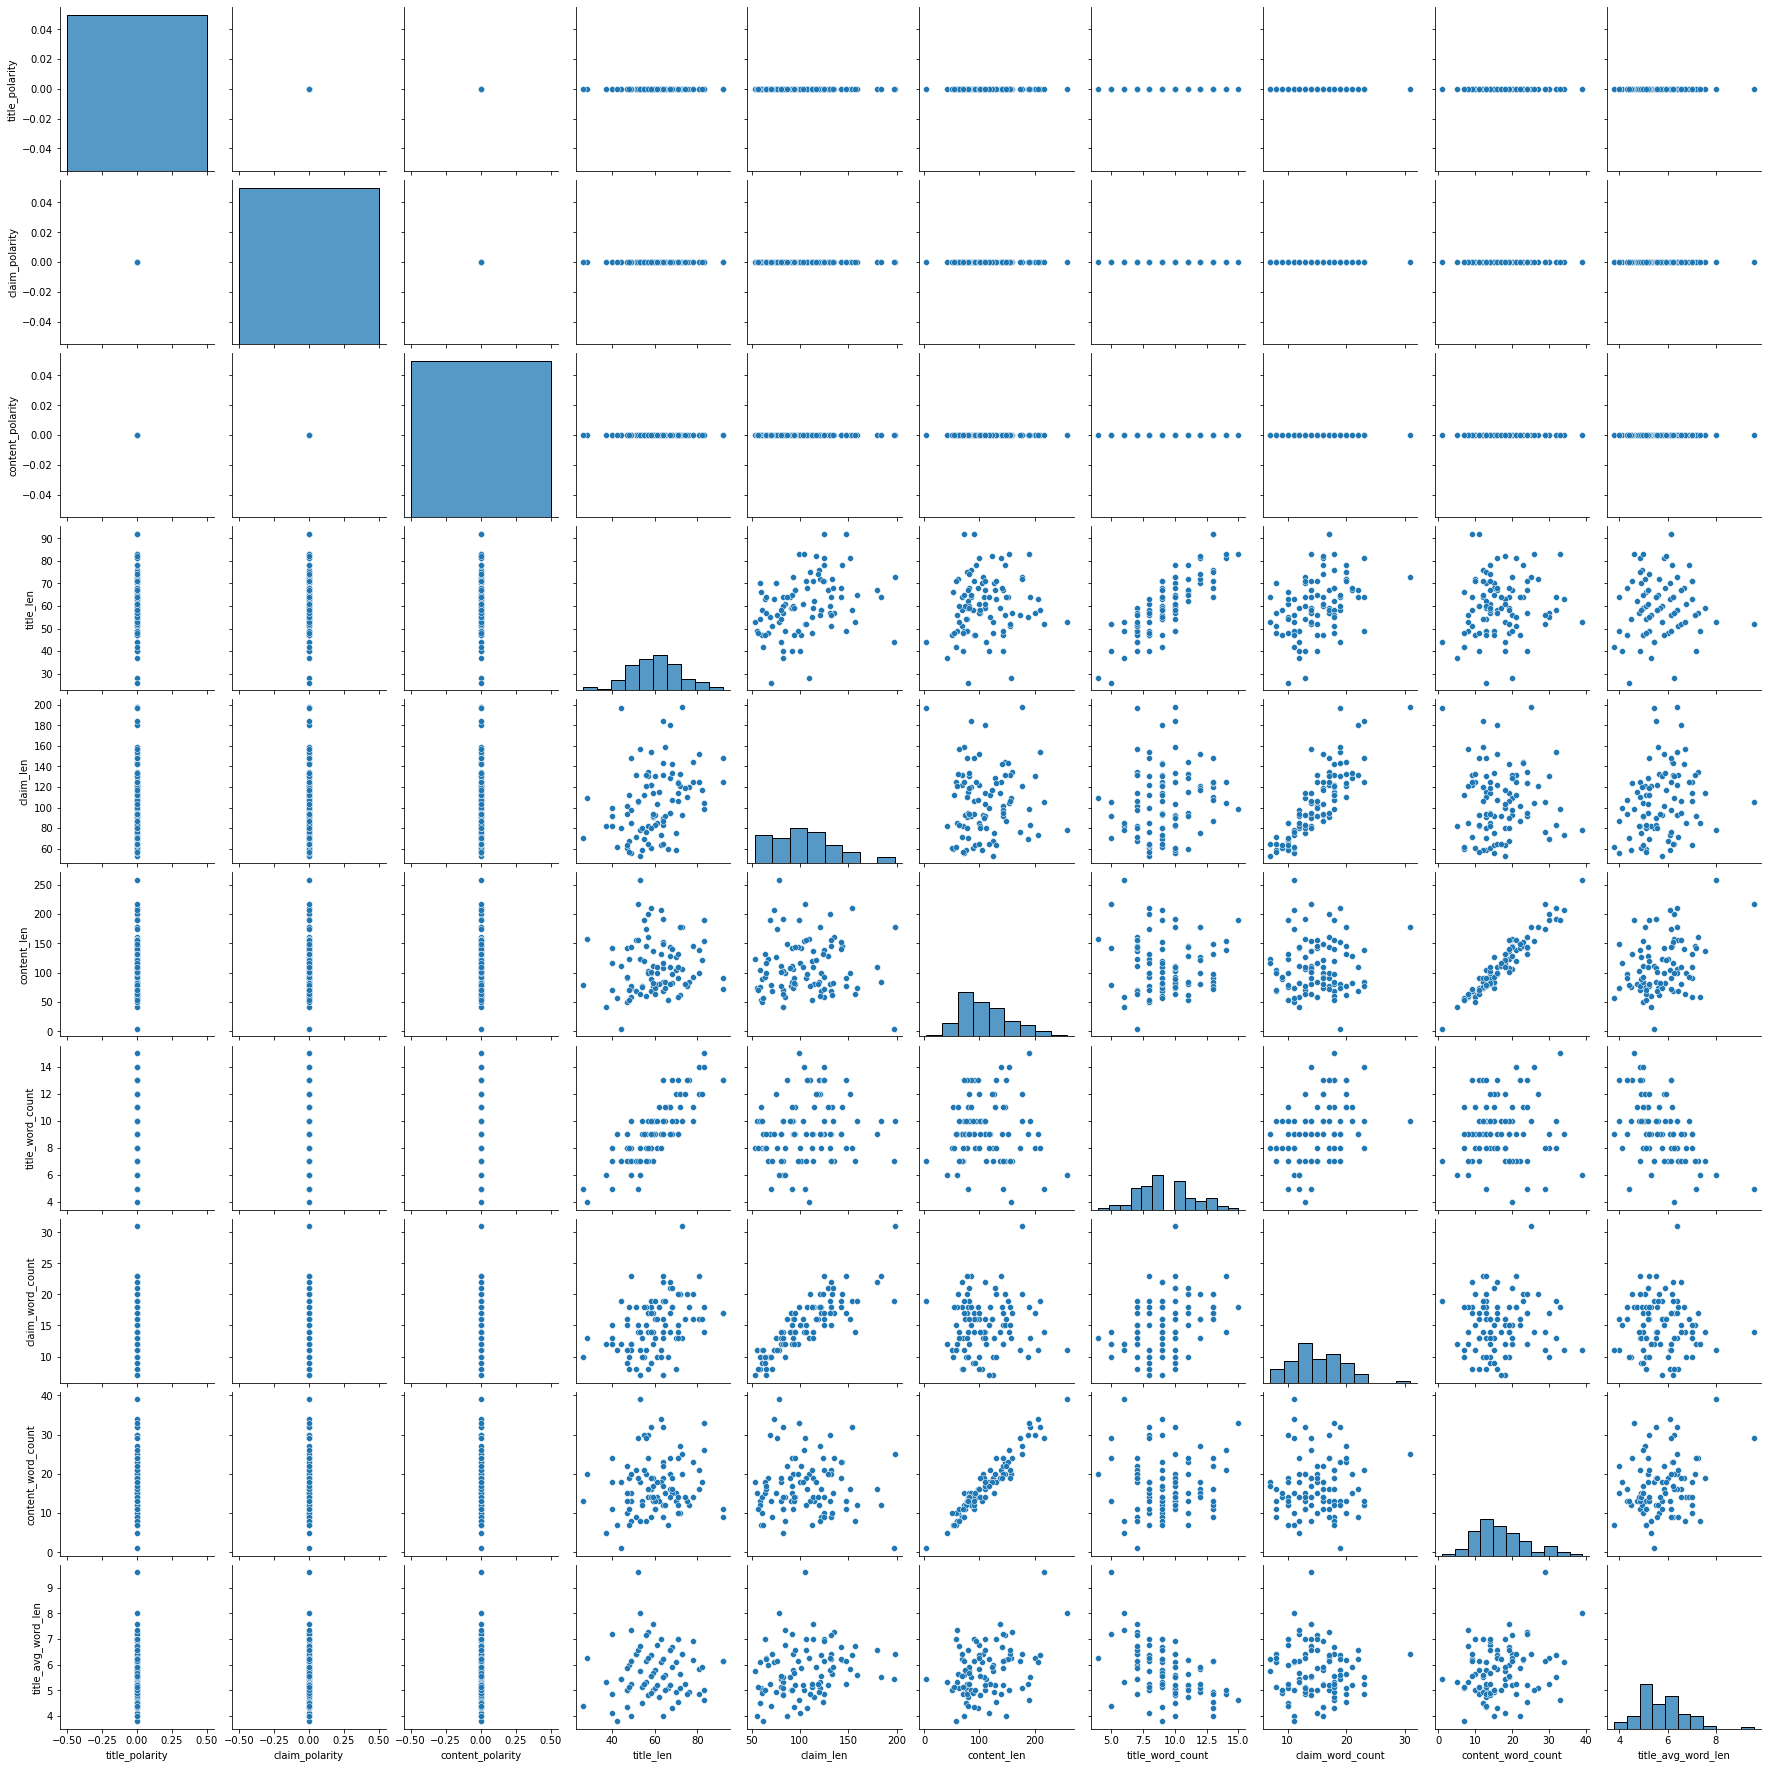

In [168]:
sns.pairplot(df)

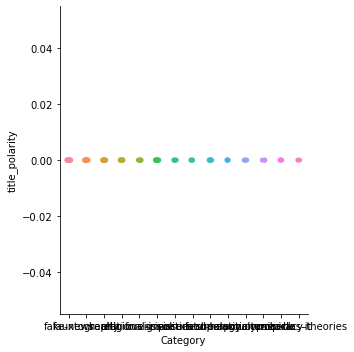

In [169]:
sns.catplot(x = 'Category', y = 'title_polarity', data = df) #swan plot

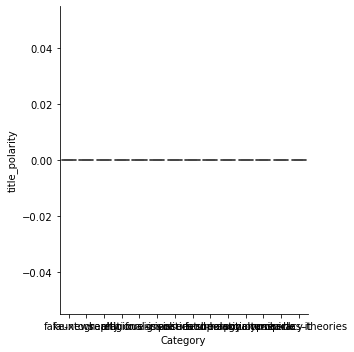

In [170]:
sns.catplot(x = 'Category', y = 'title_polarity', data = df, kind = 'box')

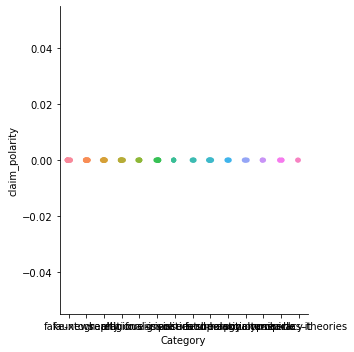

In [171]:
sns.catplot(x = 'Category', y = 'claim_polarity', data = df) #swan plot

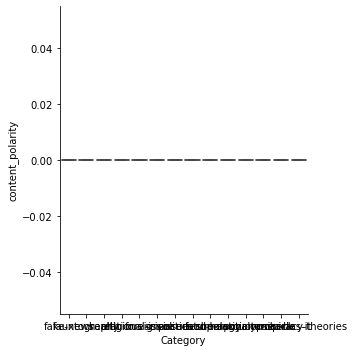

In [172]:
sns.catplot(x = 'Category', y = 'content_polarity', data = df, kind = 'box') #swan plot